In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as splt
import seaborn
%matplotlib inline


In [100]:
df=pd.read_csv('Mall.csv')
df

,customerID,gender,age,annual income (k$),spending score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [101]:
df.isnull().sum()

customerID                0
gender                    0
age                       0
annual income (k$)        0
spending score (1-100)    0
dtype: int64

In [102]:
df.rename(columns={"annual income (k$)":'income','spending score (1-100)':'score'},inplace=True)

In [103]:
df

,customerID,gender,age,income,score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [104]:
df=df.drop(['customerID'],axis=1)

In [105]:
df.describe()

,age,income,score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


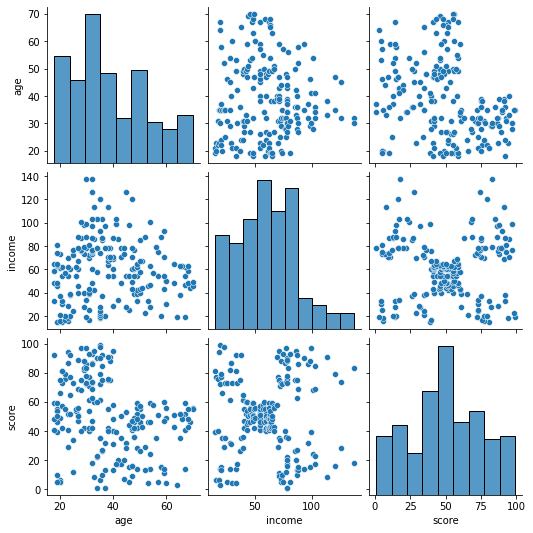

In [106]:
seaborn.pairplot(df[['age','income','score']])

In [107]:
import sklearn.cluster as cluster

In [108]:
kmean=cluster.KMeans(n_clusters=2)

In [109]:
kmean=kmean.fit(df[['age','score']])

In [110]:
kmean.cluster_centers_

array([[28.95294118, 73.62352941],
       [46.16521739, 32.88695652]])

In [111]:
df['age_cluster']=kmean.labels_

In [112]:
# adding new columns according to the cluster

In [113]:
df

,gender,age,income,score,age_cluster
0,Male,19,15,39,1
1,Male,21,15,81,0
2,Female,20,16,6,1
3,Female,23,16,77,0
4,Female,31,17,40,1
...,...,...,...,...,...
195,Female,35,120,79,0
196,Female,45,126,28,1
197,Male,32,126,74,0
198,Male,32,137,18,1


In [114]:
# for viewing the number of value in this columns

In [115]:
df['age_cluster'].value_counts()

1    115
0     85
Name: age_cluster, dtype: int64

<AxesSubplot:xlabel='age', ylabel='score'>

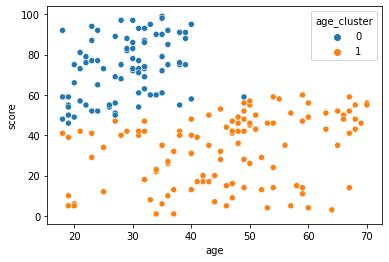

In [116]:
seaborn.scatterplot(x='age',y='score',hue='age_cluster',data=df)

# how to know the number of cluster =======

# calculation of cluster number =====================

In [128]:
#from sklearn.cluster import KMeans
import sklearn.cluster as clus 

In [129]:
krange=range(1,12)
wcss =[]

In [130]:
for k in krange:
    #km=KMeans(n_culsters=k)
    km=clus.KMeans(n_clusters=k)
    km.fit(df[['age','score']])
    wcss.append(km.inertia_)
   
    

In [131]:
wcss

[171535.50000000003,
 75949.15601023012,
 45840.67661610871,
 28165.583566629342,
 23811.5235247209,
 19489.64388446867,
 15523.684014328754,
 13055.626865965582,
 11448.046985329487,
 10494.271044816694,
 9402.77373974184]

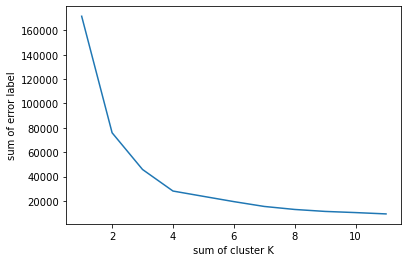

In [132]:
splt.xlabel('sum of cluster K')
splt.ylabel("sum of error label")
splt.plot(krange,wcss)